In [1]:
import pickle

In [3]:
with open("user_domain_edgelist.pkl", "rb") as fp:
    edgelist = pickle.load(fp)

In [4]:
edgelist[:10]

[(29108, 'academia', 15),
 (318519, 'academia', 6),
 (1201401, 'academia', 54),
 (106989, 'academia', 10),
 (219211, 'academia', 27),
 (103941, 'academia', 2),
 (141826, 'academia', 7),
 (510624, 'academia', 109),
 (511582, 'academia', 6),
 (298433, 'academia', 36)]

In [5]:
import networkx as nx
from networkx.algorithms import bipartite

#DomainDomain_ProjectionGraph

In [6]:
BipartiteGraph = nx.Graph()
BipartiteGraph.add_weighted_edges_from(edgelist)

# Creating adjacency list of the bipartite graph 
(This Adjacency List a list of tuples, were first element of the tuple is a node, say n1, and 2nd element of the tuple is a dictionary which maps all the nodes that n1 is connected to, to the weights with which they are connected)

In [7]:
BipartiteGraph_AdjList = [(n, nbrdict) for n, nbrdict in BipartiteGraph.adjacency()]

In [9]:
BipartiteGraph_AdjList[0]

(29108,
 {'academia': {'weight': 15},
  'chemistry': {'weight': 3},
  'cs': {'weight': 1},
  'electronics': {'weight': 10},
  'music': {'weight': 1},
  'physics': {'weight': 29},
  'scicomp': {'weight': 11}})

In [10]:
BipartiteGraph_AdjList[1]

('academia',
 {29108: {'weight': 15},
  318519: {'weight': 6},
  1201401: {'weight': 54},
  106989: {'weight': 10},
  219211: {'weight': 27},
  103941: {'weight': 2},
  141826: {'weight': 7},
  510624: {'weight': 109},
  511582: {'weight': 6},
  298433: {'weight': 36},
  128048: {'weight': 5},
  7936: {'weight': 2},
  158216: {'weight': 1},
  507882: {'weight': 79},
  257639: {'weight': 1},
  397710: {'weight': 6},
  926968: {'weight': 38},
  31909: {'weight': 3},
  459207: {'weight': 39},
  56350: {'weight': 356},
  1003615: {'weight': 68},
  56131: {'weight': 12},
  170967: {'weight': 3},
  1103952: {'weight': 1753},
  413336: {'weight': 243},
  506817: {'weight': 181},
  74035: {'weight': 55},
  505472: {'weight': 84},
  3998: {'weight': 4},
  953694: {'weight': 2},
  127155: {'weight': 2},
  406076: {'weight': 502},
  46214: {'weight': 17},
  339125: {'weight': 203},
  1010103: {'weight': 3},
  30483: {'weight': 1},
  405245: {'weight': 13},
  465049: {'weight': 650},
  130400: {'w

In [11]:
len(BipartiteGraph_AdjList)

89861

# Creating Hashmap and Inverse Hashmap

In [12]:
hashed_edgelist = []
hashmap = {}
inverse_hashmap = {}
i = 0
for edgetuple in edgelist:
    if edgetuple[0] not in hashmap:
        hashmap[edgetuple[0]] = i
        inverse_hashmap[i] = edgetuple[0]
        i+=1
    if edgetuple[1] not in hashmap:
        hashmap[edgetuple[1]] = i
        inverse_hashmap[i] = edgetuple[1]
        i+=1
        
#print(hashmap)

In [26]:
hashmap[edgelist[0][0]]  ## edgelist[0][0] = 29108

0

In [27]:
hashmap[edgelist[0][1]]  ## edgelist[0][1] = "academia"

1

In [46]:
hashmap['academia']

1

In [28]:
hashmap[edgelist[1][0]]  ## edgelist[1][0] = 318519

2

In [29]:
hashmap[edgelist[1][1]]  ## edgelist[0][2] = "academia"

1

In [38]:
BipartiteGraph_AdjList[hashmap[edgelist[0][1]]][1].keys() ## All the users edgelist[0][1] i.e 'academia' is connected to

dict_keys([29108, 318519, 1201401, 106989, 219211, 103941, 141826, 510624, 511582, 298433, 128048, 7936, 158216, 507882, 257639, 397710, 926968, 31909, 459207, 56350, 1003615, 56131, 170967, 1103952, 413336, 506817, 74035, 505472, 3998, 953694, 127155, 406076, 46214, 339125, 1010103, 30483, 405245, 465049, 130400, 510141, 4521361, 470379, 501919, 292477, 152144, 273436, 13549, 307976, 60581, 278712, 1246828, 465573, 128012, 208980, 78178, 144312, 1070010, 252036, 90154, 390363, 44900, 1117904, 178276, 432704, 141090, 470945, 913686, 65026, 85747, 514307, 315381, 509934, 513943, 1142161, 57288, 466096, 5049, 183606, 80211, 429171, 41665, 344457, 1053898, 1156817, 68240, 513706, 1252097, 20514, 18290, 250981, 241887, 1279610, 1475, 143307, 333594, 1156302, 114972, 301392, 1224647, 1189911, 514281, 910943, 146350, 1328091, 67441, 133273, 224504, 12877, 232525, 128006, 188507, 148070, 135449, 395234, 180055, 1158758, 58413, 1050726, 267541, 1196822, 1143860, 1356073, 510571, 350536, 502062

In [13]:
type(list(BipartiteGraph_AdjList[hashmap['buddhism']][1].keys())[1])

int

In [14]:
BipartiteGraph_AdjList[1][1][29108]['weight']

15

# Building the domain-domain projection network

In [15]:
DomainsList = []
for eachtuple in edgelist :
    if eachtuple[1] not in DomainsList:
        DomainsList.append(eachtuple[1])

In [16]:
DomainsList

['academia',
 'buddhism',
 'chemistry',
 'chinese',
 'cs',
 'cseducators',
 'datascience',
 'economics',
 'electronics',
 'french',
 'gamedev',
 'hermeneutics',
 'hinduism',
 'islam',
 'linguistics',
 'matheducators',
 'music',
 'or',
 'physics',
 'quant',
 'robotics',
 'russian',
 'scicomp',
 'spanish',
 'stats',
 'tor']

In [17]:
ProjectionNetwork = nx.Graph()

In [18]:
ProjectionNetwork.add_nodes_from(DomainsList)

In [19]:
#BipartiteGraph.add_weighted_edges_from(edgelist) edgelist is a list of edgetuples
for i in range(len(DomainsList)-1):
    print(DomainsList[i])
    for j in range(i+1,len(DomainsList)):
        #print(DomainsList[j])
        Domain1 = DomainsList[i]
        Domain2 = DomainsList[j]
        hashedDomain1 = hashmap[Domain1]
        #print(hashedDomain1)
        hashedDomain2 = hashmap[Domain2]
        #print(hashedDomain2)
        #We want to calculate the edgeweight between Domain1 and Domain2 in the projection Network
        
        
        #Find the list of common neighbours between Domain1 and Domain2
        Dict1_of_Neighbours = BipartiteGraph_AdjList[hashedDomain1][1]
        Dict2_of_Neighbours = BipartiteGraph_AdjList[hashedDomain2][1]
        List1 = list(Dict1_of_Neighbours.keys())
        List2 = list(Dict2_of_Neighbours.keys())
        List_of_Common_Neighbours = list(set(List1) & set(List2))
        
        #Each common user contributes something to the total edgeweight between Domain1 and Domain2
        #We find how important each commonuser is to domain1 and to domain2 and multiply the normalised importance
        #to get the contribution to total edgeweight between Domain1 and Domain2 by each commonuser.
        edgeweight = 0
        for commonUser in List_of_Common_Neighbours:
            importance1 = BipartiteGraph_AdjList[hashedDomain1][1][commonUser]['weight']
            importance2 = BipartiteGraph_AdjList[hashedDomain2][1][commonUser]['weight']
            
            sum1 = 0
            for users in List1:
                sum1 += BipartiteGraph_AdjList[hashedDomain1][1][users]['weight']
            sum2 = 0
            for users in List2:
                sum2 += BipartiteGraph_AdjList[hashedDomain2][1][users]['weight']
                
            normalised_importance1 = importance1/sum1
            normalised_importance2 = importance2/sum2
            
            edgeweight += normalised_importance1*normalised_importance1
            
        if edgeweight !=0:
            ProjectionNetwork.add_edge(Domain1, Domain2, weight=edgeweight)

academia
buddhism
chemistry
chinese
cs
cseducators
datascience
economics
electronics
french
gamedev
hermeneutics
hinduism
islam
linguistics
matheducators
music
or
physics
quant
robotics
russian
scicomp
spanish
stats


Started 12:34 PM
Ended 12:46 PM

In [20]:
# dump to gml
nx.write_gml(ProjectionNetwork, "DomainDomainProjection.gml")

In [21]:
edges = ProjectionNetwork.edges()
pos = nx.spring_layout(ProjectionNetwork)

In [22]:
import matplotlib.pyplot as plt

weights = [ProjectionNetwork[u][v]['weight']*500 for u,v in edges]

plt.figure(figsize=(15,10))
nx.draw(ProjectionNetwork, edges=edges, width=weights, with_labels = True, node_size = 500, node_color = 'y', font_color = 'r', font_size = 20)
plt.savefig('DomainDomainProjection_Users.png')
plt.show()

<Figure size 1500x1000 with 1 Axes>

# Running LOUVAIN Community Detection Algorithm

In [25]:
import community
import networkx as nx
import matplotlib.pyplot as plt

In [26]:
from community import community_louvain
partition = community_louvain.best_partition(ProjectionNetwork, resolution = 0.5)

In [29]:
ProjectionNetwork["academia"]

AtlasView({'buddhism': {'weight': 7.98976358482061e-06}, 'chemistry': {'weight': 0.0008714950169952082}, 'chinese': {'weight': 3.337861925293763e-05}, 'cs': {'weight': 0.0009678157608728971}, 'cseducators': {'weight': 0.0009155025909400538}, 'datascience': {'weight': 0.0001295208337777845}, 'economics': {'weight': 0.00014404894738806985}, 'electronics': {'weight': 0.001083338407117482}, 'french': {'weight': 7.820258014923835e-05}, 'gamedev': {'weight': 6.051118827317626e-05}, 'hermeneutics': {'weight': 1.781542465737479e-05}, 'hinduism': {'weight': 3.911190628985281e-06}, 'islam': {'weight': 6.986053515558224e-05}, 'linguistics': {'weight': 0.00015393724413050258}, 'matheducators': {'weight': 0.001768159134003227}, 'music': {'weight': 0.0010198670641633372}, 'or': {'weight': 3.8711674975545416e-05}, 'physics': {'weight': 0.0011867576833111664}, 'quant': {'weight': 5.534038370672237e-05}, 'robotics': {'weight': 0.00017993706298531385}, 'russian': {'weight': 3.467238201607449e-05}, 'scic

In [27]:
partition

{'academia': 0,
 'buddhism': 1,
 'chemistry': 0,
 'chinese': 2,
 'cs': 0,
 'cseducators': 3,
 'datascience': 0,
 'economics': 4,
 'electronics': 3,
 'french': 2,
 'gamedev': 2,
 'hermeneutics': 5,
 'hinduism': 1,
 'islam': 5,
 'linguistics': 2,
 'matheducators': 3,
 'music': 6,
 'or': 4,
 'physics': 6,
 'quant': 1,
 'robotics': 5,
 'russian': 2,
 'scicomp': 0,
 'spanish': 2,
 'stats': 4,
 'tor': 2}

# Nothing really worked after this!

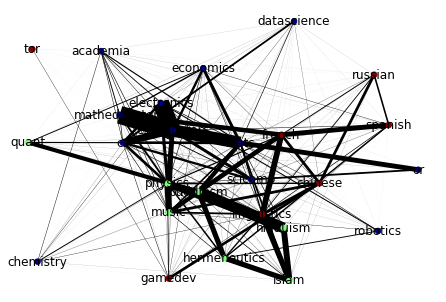

In [211]:
values = list(partition.values())

nx.draw_spring(ProjectionNetwork, width=weights, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=True)

In [205]:
color = []
for i in ProjectionNetwork.nodes():
    color.append(partition[i])

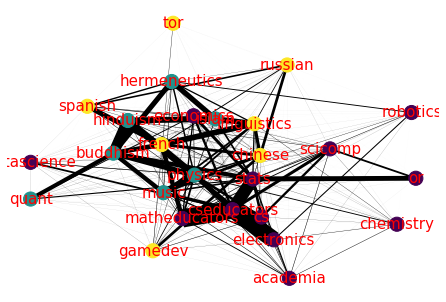

<Figure size 1080x720 with 0 Axes>

In [206]:
nx.draw(ProjectionNetwork, pos=nx.spring_layout(ProjectionNetwork), width=weights, node_color = color, with_labels = True, node_size = 200, font_color = 'r', font_size = 15)
plt.figure(figsize=(15,10))
#nx.draw(ProjectionNetwork, node_color = color, with_labels = True)
plt.savefig("DomainDomain_Louvain.png")
plt.show()

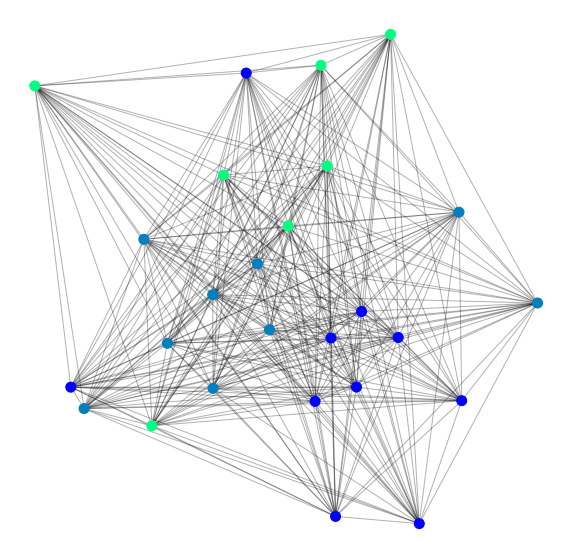

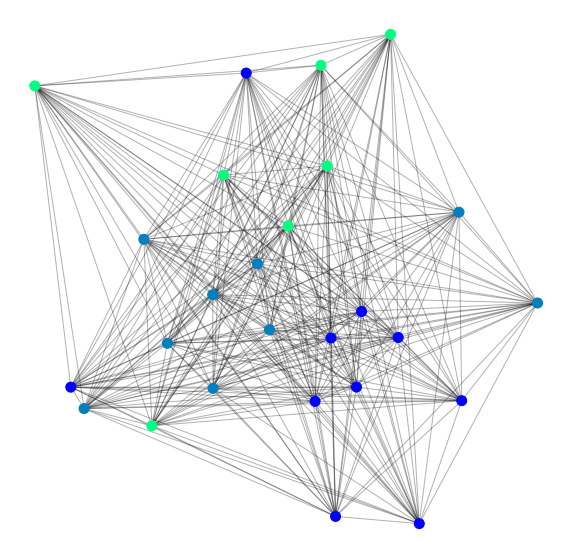

In [188]:
pos = nx.spring_layout(ProjectionNetwork)  # compute graph layout
plt.figure(figsize=(10, 10))  # image is 8 x 8 inches
plt.axis('off')
nodes = nx.draw_networkx_nodes(ProjectionNetwork, pos, node_size=100, cmap=plt.cm.winter, node_color=list(partition.values()), with_labels = True)
nx.draw_networkx_edges(ProjectionNetwork, pos, alpha=0.3, with_labels = True)
plt.show(G)